In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from plotnine import *
import itertools
#from nilearn import image, plotting, datasets
#import nibabel as nib
import pdb
import os
import warnings
warnings.filterwarnings("ignore")

curr_dir = '/user_data/vayzenbe/GitHub_Repos/ginn'
data_dir = f"/lab_data/behrmannlab/vlad/ginn/modelling"
results_dir = f'{curr_dir}/results'
#training info
model_archs = ['cornet_z_sl','cornet_z_cl']
vid = 'DM-clip'
'''
set model params
'''

train_types = ['random','imagenet_noface', 'imagenet_oneface', 'imagenet_vggface', 'vggface_oneobject', 'vggface']

train_dir = f'/lab_data/behrmannlab/image_sets/'
#n_classes = len(glob(f'{args.data}/train/*'))
#layer =['aIT','pIT'] #set in descending order
layer_type = ['pIT','aIT']

In [ ]:
'''
Plot model RSA
'''


cornet_z_cl_imagenet_noface_aIT


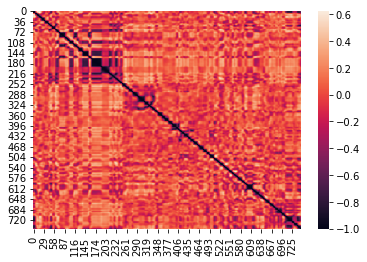

cornet_z_cl_imagenet_oneface_aIT


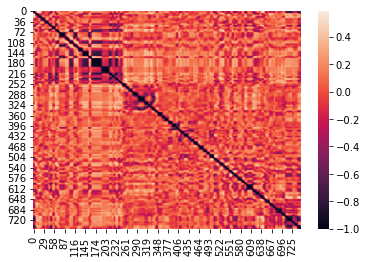

cornet_z_cl_imagenet_vggface_aIT


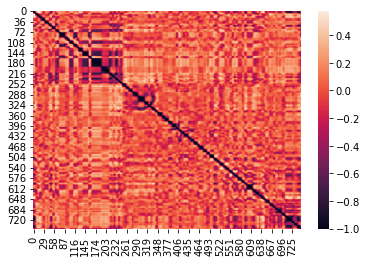

cornet_z_cl_vggface_oneobject_aIT


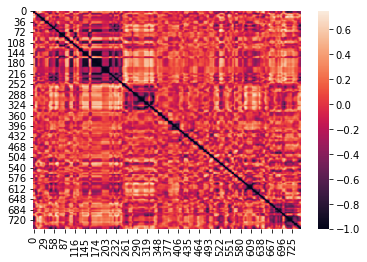

cornet_z_cl_vggface_aIT


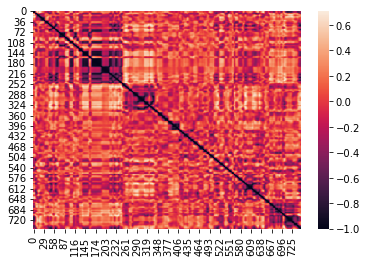

cornet_z_cl_random_aIT


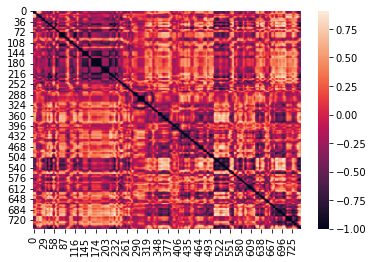

In [9]:
"""
Plot model movie RDMs
"""






for model_arch in model_archs:
    for train_type in train_types:
        for layer in layer_type:
            print(f'{model_arch}_{train_type}_{layer}')
            rdm = np.load(f'{data_dir}/{model_arch}_{train_type}_{layer}_{vid}_rdm.npy')
            sns.heatmap(rdm)
            plt.pause(0.001)



In [8]:
np.max(rdm)

0.900928795498589

lLO


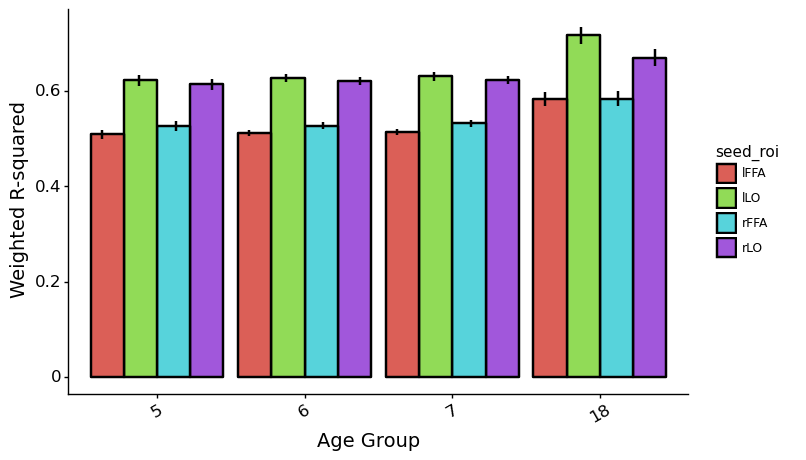


rLO


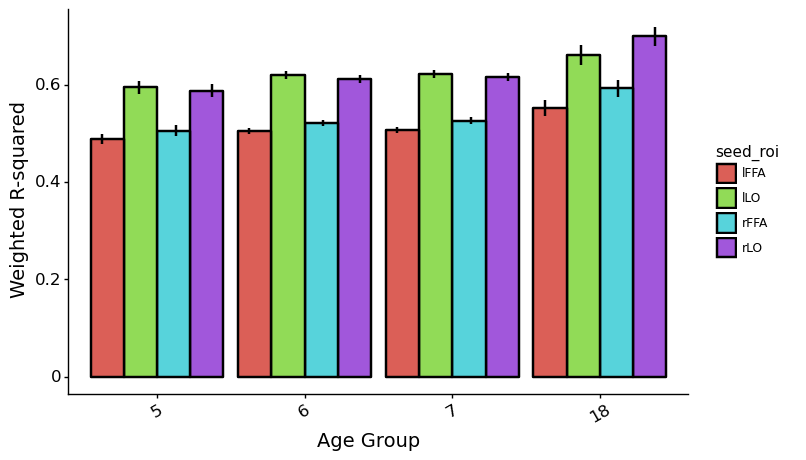


lFFA


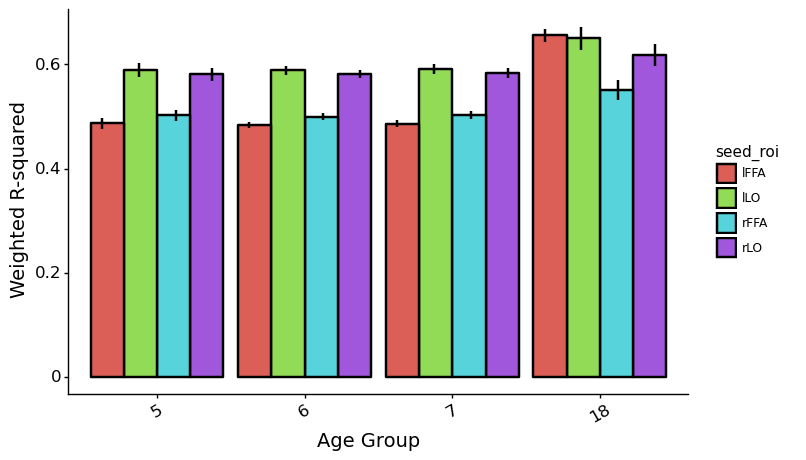


rFFA


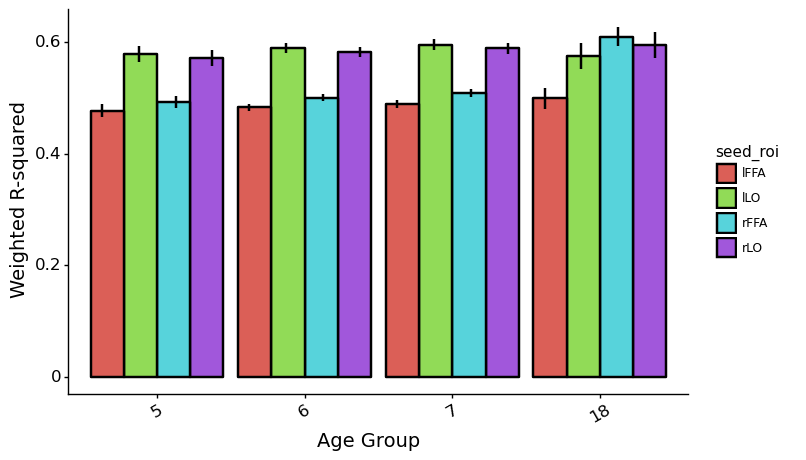

In [39]:
"""
MVPD using SRM as predictors
"""
exp = 'mvpd'
suf = '_10_pcs_r2'
#suf = '_all'
n_feat = 200

rois = ['lLO','rLO','lFFA', 'rFFA']
ages = [ 5, 6, 7, 18]
seed_age = 18


# Load data
df = pd.read_csv(f'{results_dir}/{exp}/srm_summary_{n_feat}.csv')
df['age'] = df['age'].apply(np.floor)
df['age'][df['age'] >= 18] = 18
'''
summary_df = df.groupby(['roi','seed_roi','age']).mean()

plot = ggplot(summary_df, aes(x = 'age', y = 'R2', fill = 'seed_roi')) + \
                    geom_col(stat='identity', size = 1, color = 'Black',position='dodge') + \
                    geom_linerange(aes(x='age',  ymax = 'R2 + se', ymin = 'R2 - se'), size = 1, position=position_dodge2(width=1)) + \
                    theme_classic() + xlab('Age Group') + ylab('Weighted R-squared') + \
                    theme(text = element_text(color ='black'), axis_text_x= element_text(angle = 30, size = 12),axis_text_y= element_text(size = 12),axis_title=element_text(size = 14),
                                                                                    axis_line=element_line(), 
                                                                                    panel_border=element_blank(),
                                                                                    figure_size = (8, 5))
    
print(plot)
'''

for target_roi in rois:
    print(target_roi)
    summary_df = pd.DataFrame(columns = ['target_roi','seed_roi', 'age', 'r2', 'se'])
    for seed_roi in rois:
        for age in ages:
            curr_df = df[(df['roi'] == target_roi) & (df['seed_roi'] == seed_roi) & (df['age'] == age)]

            summary_df = summary_df.append(pd.Series([target_roi,seed_roi, age, curr_df['r2'].mean(), curr_df['r2'].sem()],
                index = summary_df.columns), ignore_index=True)
    
    summary_df['r2'] = summary_df['r2'].astype(float)
    summary_df['se'] = summary_df['se'].astype(float)
    plot = ggplot(summary_df, aes(x = 'age', y = 'r2', fill = 'seed_roi')) + \
                    geom_col(stat='identity', size = 1, color = 'Black',position='dodge') + \
                    geom_linerange(aes(x='age',  ymax = 'r2 + se', ymin = 'r2 - se'), size = 1, position=position_dodge2(width=1)) + \
                    theme_classic() + xlab('Age Group') + ylab('Weighted R-squared') + \
                    theme(text = element_text(color ='black'), axis_text_x= element_text(angle = 30, size = 12),axis_text_y= element_text(size = 12),axis_title=element_text(size = 14),
                                                                                    axis_line=element_line(), 
                                                                                    panel_border=element_blank(),
                                                                                    figure_size = (8, 5))
    
    print(plot)
    del plot    
            



In [30]:
summary_df

target_roi  \
0  96      lLO
108     lLO
138     lLO
192     lL...   

                                            seed_roi  \
0  96      lLO
108     lLO
138     lLO
192     lL...   

                                                 age        r2        se  
0  96      5.0
108     5.0
138     5.0
192     5....  0.623262  0.011507

In [9]:
df

Unnamed: 0           sub  age   roi        r2  seed_age seed_roi
0              0  NDAREG930XPP  7.0   lLO  0.633627        18      lLO
1              1  NDAREG930XPP  7.0   rLO  0.581558        18      lLO
2              2  NDAREG930XPP  7.0  lFFA  0.607646        18      lLO
3              3  NDAREG930XPP  7.0  rFFA  0.642567        18      lLO
4              4  NDAREG930XPP  7.0  lOFA  0.595389        18      lLO
...          ...           ...  ...   ...       ...       ...      ...
8131        1351  NDARZC495EAG  6.0   rLO  0.607288        18     rOFA
8132        1352  NDARZC495EAG  6.0  lFFA  0.486730        18     rOFA
8133        1353  NDARZC495EAG  6.0  rFFA  0.579466        18     rOFA
8134        1354  NDARZC495EAG  6.0  lOFA  0.471731        18     rOFA
8135        1355  NDARZC495EAG  6.0  rOFA  0.500035        18     rOFA

[8136 rows x 7 columns]

In [18]:
df.groupby(['roi','seed_roi','age']).mean()

Unnamed: 0        r2  seed_age
roi  seed_roi age                                 
lFFA lFFA     5.0   678.536585  0.486690      18.0
              6.0   681.975610  0.483275      18.0
              7.0   690.120482  0.486369      18.0
              18.0  599.000000  0.655951      18.0
     lLO      5.0   678.536585  0.589345      18.0
...                        ...       ...       ...
rOFA rLO      18.0  602.000000  0.722466      18.0
     rOFA     5.0   681.536585  0.519903      18.0
              6.0   684.975610  0.533519      18.0
              7.0   693.120482  0.545124      18.0
              18.0  602.000000  0.711983      18.0

[144 rows x 3 columns]

lLO


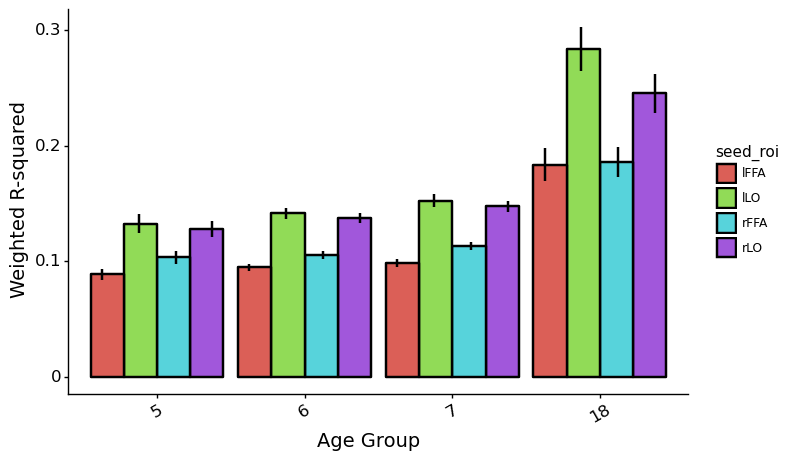


rLO


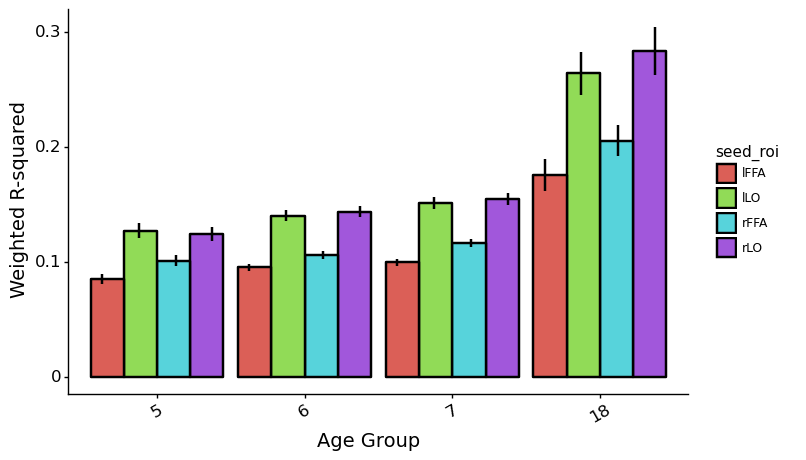


lFFA


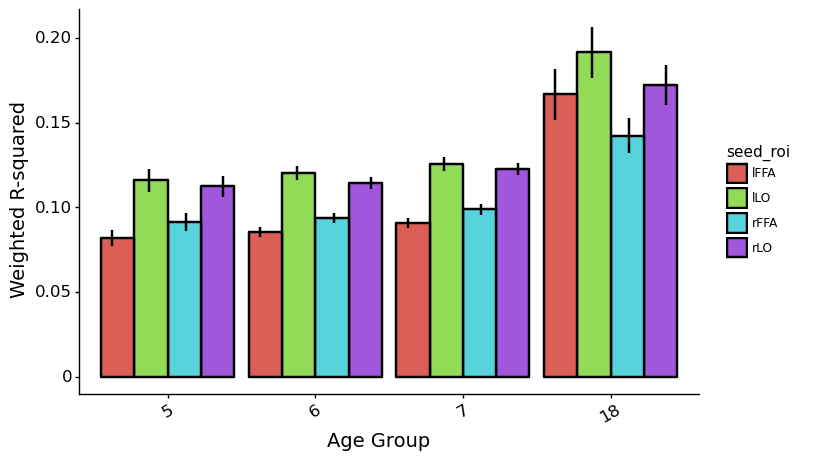


rFFA


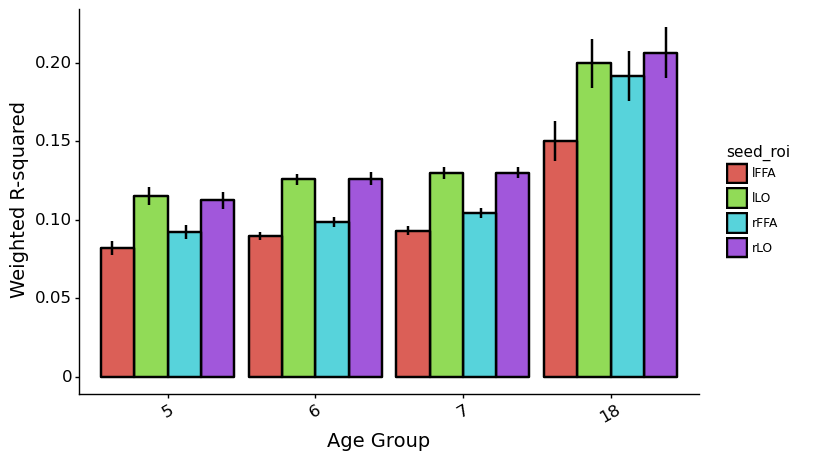

In [5]:
"""
MVPD of face regions ORIGINAL
"""
exp = 'mvpd'
suf = '_10_pcs_r2'
#suf = '_all'

rois = ['lLO','rLO','lFFA', 'rFFA']
ages = [ 5, 6, 7, 18]
seed_age = 18

for target_roi in rois:
    summary_df = pd.DataFrame(columns = ['target_roi','seed_roi', 'age', 'R2', 'se'])
    for seed_roi in rois:
        curr_df = pd.read_csv(f'{results_dir}/{exp}/{seed_roi}_{seed_age}_summary{suf}.csv')
        curr_df = curr_df[curr_df['target_roi']==target_roi]
        curr_df['age_group'] = curr_df['target_age'].apply(np.floor)
        curr_df['age_group'][curr_df['age_group']>=18] = 18

        for age in ages:
            age_df = curr_df[curr_df['age_group']==age]
            curr_data = pd.Series([target_roi, seed_roi, age, age_df['r2'].mean(), age_df['r2'].sem()], index = summary_df.columns)
            
            summary_df = summary_df.append(curr_data, ignore_index=True)
    


    summary_df['R2'] = summary_df['R2'].astype(float)
    summary_df['se'] = summary_df['se'].astype(float)
    #plot = ggplot(summary_df, aes(x = 'age', y = 'R2', fill = 'seed_roi')) + geom_col() + ylim(0,1)
    print(target_roi)
    plot = ggplot(summary_df, aes(x = 'age', y = 'R2', fill = 'seed_roi')) + \
                    geom_col(stat='identity', size = 1, color = 'Black',position='dodge') + \
                    geom_linerange(aes(x='age',  ymax = 'R2 + se', ymin = 'R2 - se'), size = 1, position=position_dodge2(width=1)) + \
                    theme_classic() + xlab('Age Group') + ylab('Weighted R-squared') + \
                    theme(text = element_text(color ='black'), axis_text_x= element_text(angle = 30, size = 12),axis_text_y= element_text(size = 12),axis_title=element_text(size = 14),
                                                                                    axis_line=element_line(), 
                                                                                    panel_border=element_blank(),
                                                                                    figure_size = (8, 5))
    
    print(plot)
    del plot
    
    





In [21]:
"""
Model setup

"""

model_type = ['cornet_z_cl', 'cornet_z_sl']

train_type = ['random','imagenet_noface', 'imagenet_oneface',
'imagenet_vggface', 'vggface_oneobject', 'vggface']

layer_type = [['decoder', 'decoder', 'decoder'],['decoder', 'decoder', 'decoder']]
sublayer_type = [['avgpool', 'linear','l2norm'],['avgpool', 'linear','output']]


seed = 1

suf = ''

In [28]:
"""
Plot classification mean data
"""
exp = 'classify'

cond = ['upright','inverted']
test_type = ['objects', 'faces']

suf = ''

for mm in enumerate(model_type):
    for ll in sublayer_type[mm[0]]:
        
        summary_df = pd.DataFrame(columns = ['arch','train_type','image_type', 'condition', 'acc', 'se'])
        for trt in train_type:
            for tt in test_type:
                for cc in cond:
                    
                    curr_df = pd.read_csv(f'{results_dir}/{exp}/{mm[1]}_{trt}_{ll}_{tt}_{cc}{suf}.csv')
                    curr_data = pd.Series([mm[1],trt,tt,cc, curr_df['acc'].mean(), curr_df['acc'].sem()],
                                            index = summary_df.columns)
                    summary_df = summary_df.append(curr_data, ignore_index=True)

            #summary_df = pd.concat([summary_df, curr_data])
        summary_df['acc'] = summary_df['acc'].astype(float)
        summary_df['se'] = summary_df['se'].astype(float)

        summary_df['condition'] = pd.Categorical(summary_df['condition'], categories = cond, ordered = False)
        summary_df['image_type'] = pd.Categorical(summary_df['image_type'], categories = test_type, ordered = False)
        summary_df['train_type'] = pd.Categorical(summary_df['train_type'], categories = train_type, ordered = False)


#plot = ggplot(summary_df, aes(x = 'model', y = 'acc', fill = 'image_type')) + geom_col(stat='identity', position='dodge') + \
#     lims(y=(0, .5))
        print([mm[1], ll])
        plot = ggplot(summary_df, aes(x = 'train_type', y = 'acc', color = 'condition')) + \
            geom_linerange(aes(x='train_type',  ymax = 'acc + se', ymin = 'acc - se', linetype = 'image_type'), size = 1,position=position_dodge2(width=.5)) + \
            geom_point(aes(shape = 'image_type'), size = 4, fill = 'White', stroke = 1,position=position_dodge2(width=.5)) + \
            geom_hline(yintercept=.03, linetype = 'dashed') + theme_classic() + xlab('Model Type') + ylab('Classification Accuracy') + \
                    theme(text = element_text(color ='black'), axis_text_x= element_text(angle = 30, size = 12),axis_text_y= element_text(size = 12),axis_title=element_text(size = 14),
                                                                                    axis_line=element_line(), 
                                                                                    panel_border=element_blank(),
                                                                                    figure_size = (10, 5))

        print(plot)
        del plot
        


NameError: name 'model_type' is not defined

In [17]:
print(f'{results_dir}/{exp}/{mm[1]}_{trt}_{layer}_{tt}_{cc}{suf}.csv')

/user_data/vayzenbe/GitHub_Repos/ginn/results/classify/cornet_z_cl_imagenet_noface_avgpool_objects_upright.csv


In [15]:
linear = summary_df

['cornet_z_cl', 'cropped_face', 'avgpool']


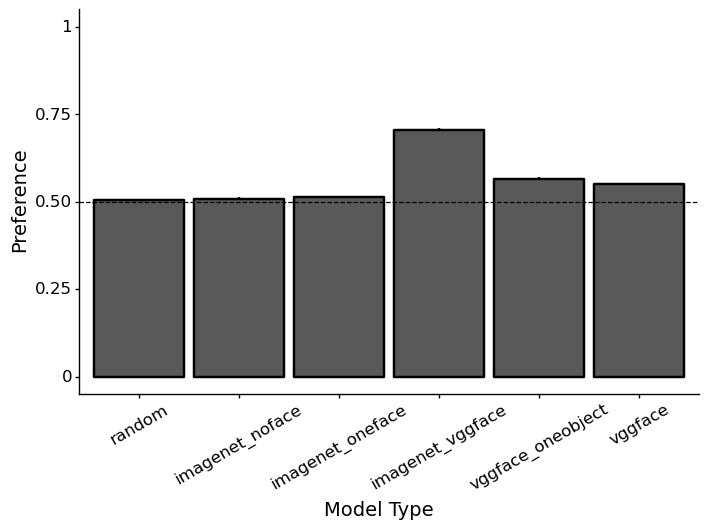


['cornet_z_cl', 'schematic', 'avgpool']


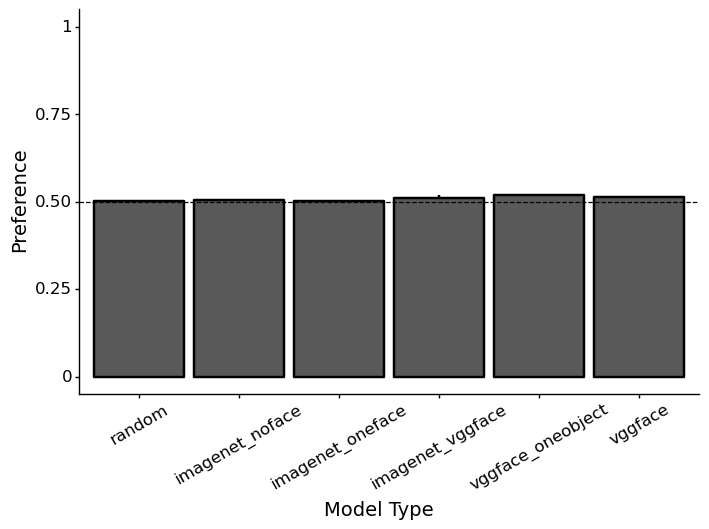


['cornet_z_cl', 'au', 'avgpool']


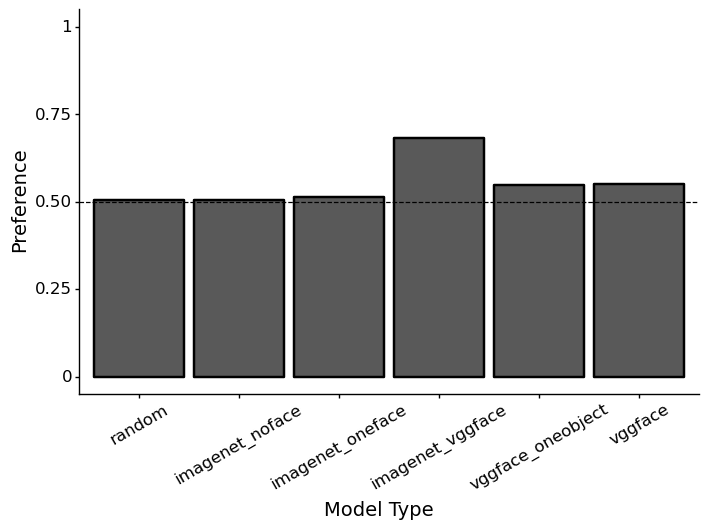


['cornet_z_cl', 'cropped_face', 'linear']


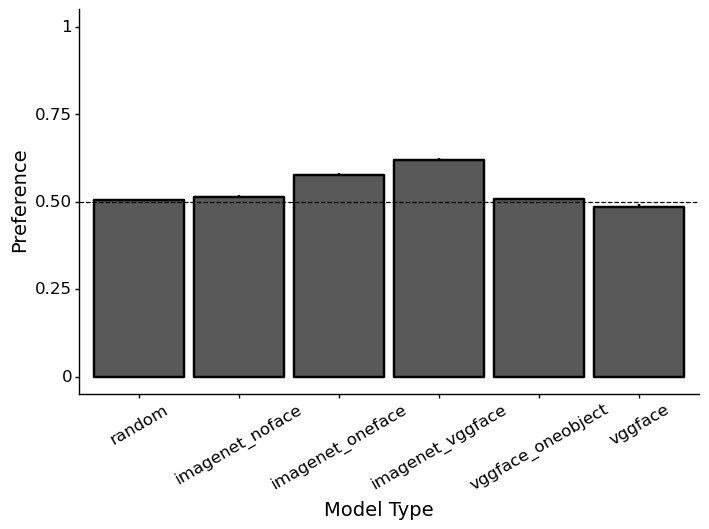


['cornet_z_cl', 'schematic', 'linear']


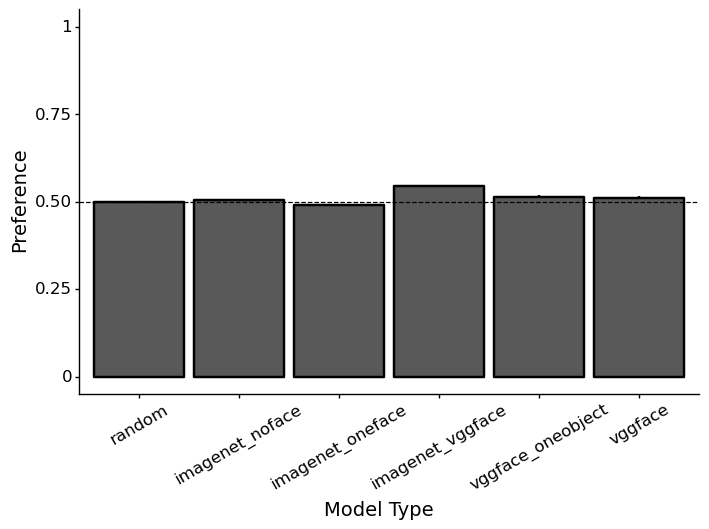


['cornet_z_cl', 'au', 'linear']


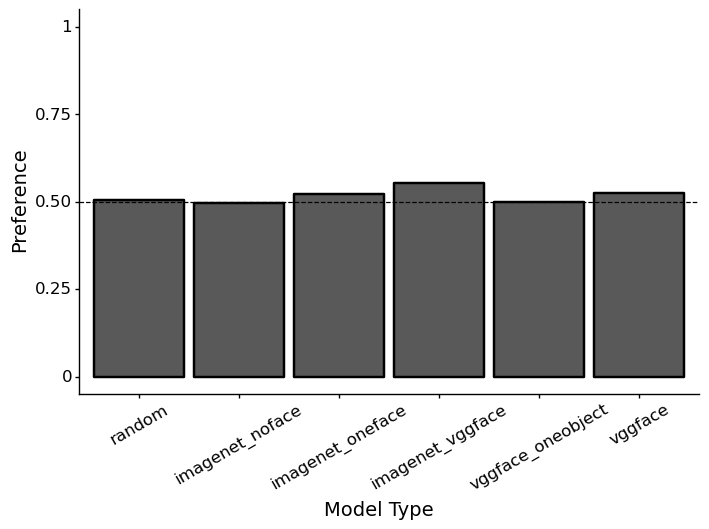


['cornet_z_cl', 'cropped_face', 'l2norm']


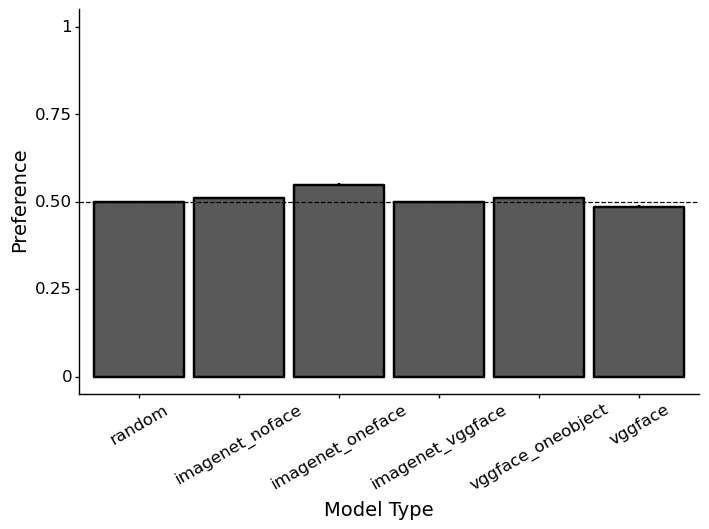


['cornet_z_cl', 'schematic', 'l2norm']


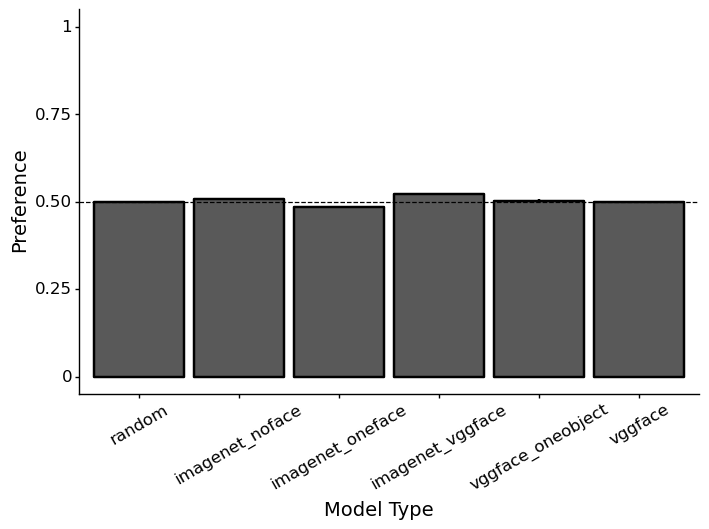


['cornet_z_cl', 'au', 'l2norm']


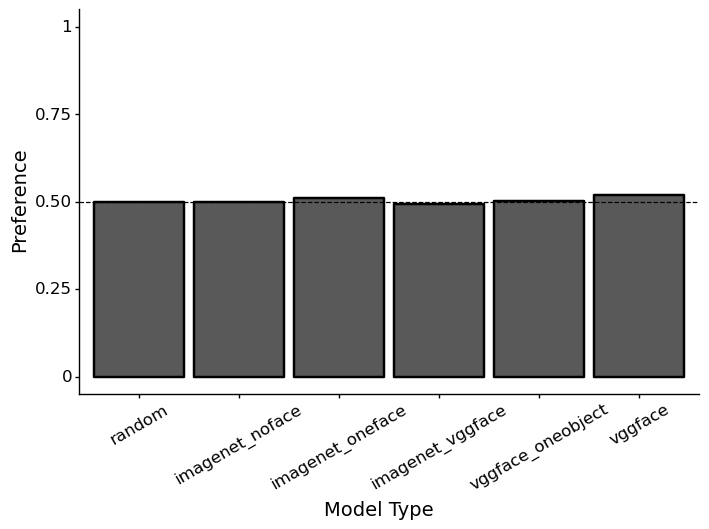


['cornet_z_sl', 'cropped_face', 'avgpool']


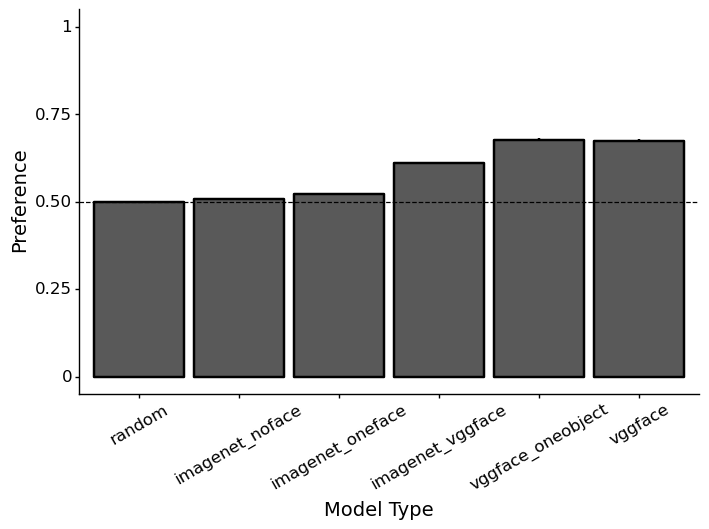


['cornet_z_sl', 'schematic', 'avgpool']


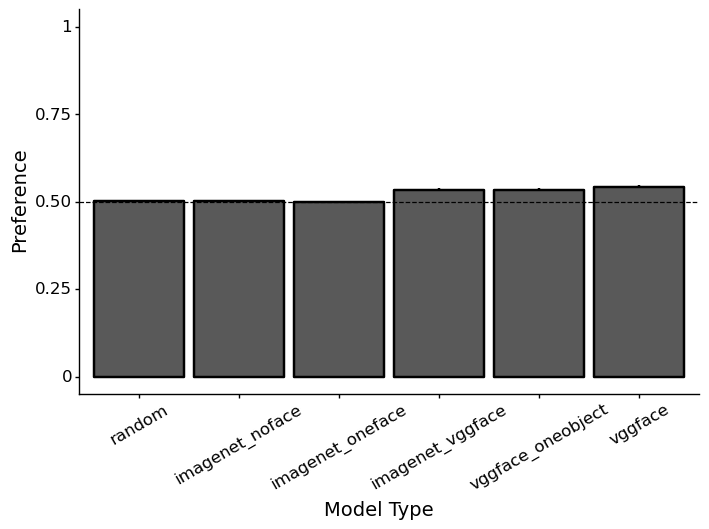


['cornet_z_sl', 'au', 'avgpool']


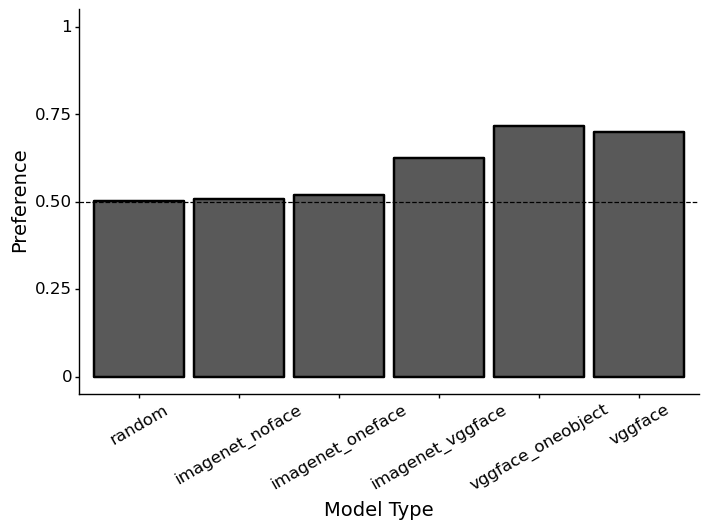


['cornet_z_sl', 'cropped_face', 'linear']


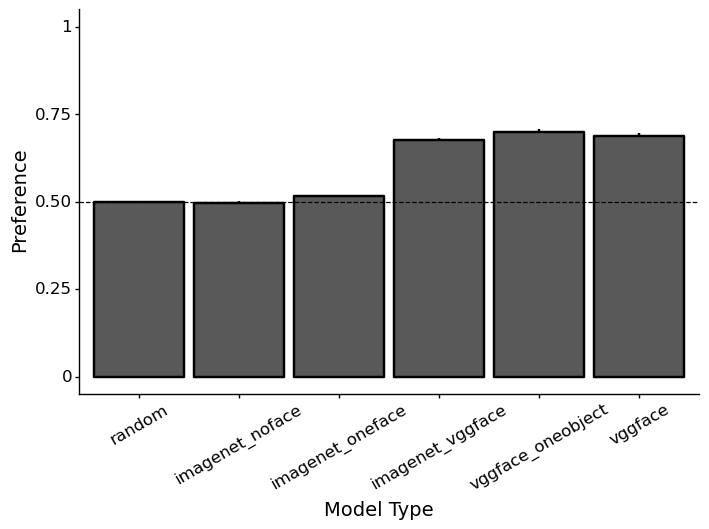


['cornet_z_sl', 'schematic', 'linear']


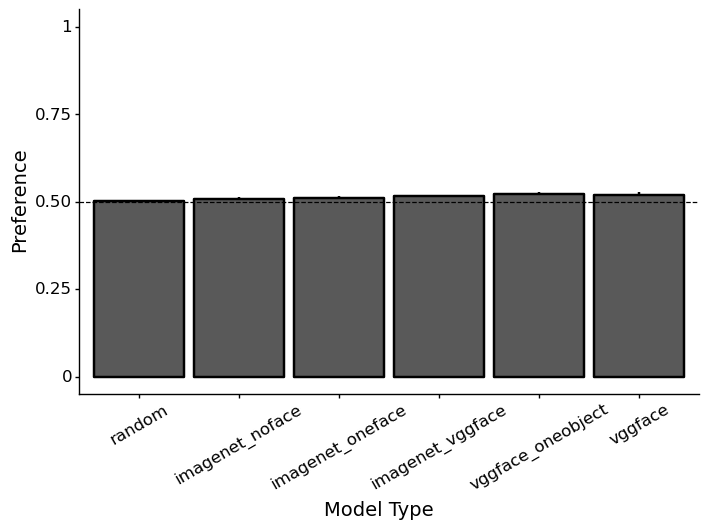


['cornet_z_sl', 'au', 'linear']


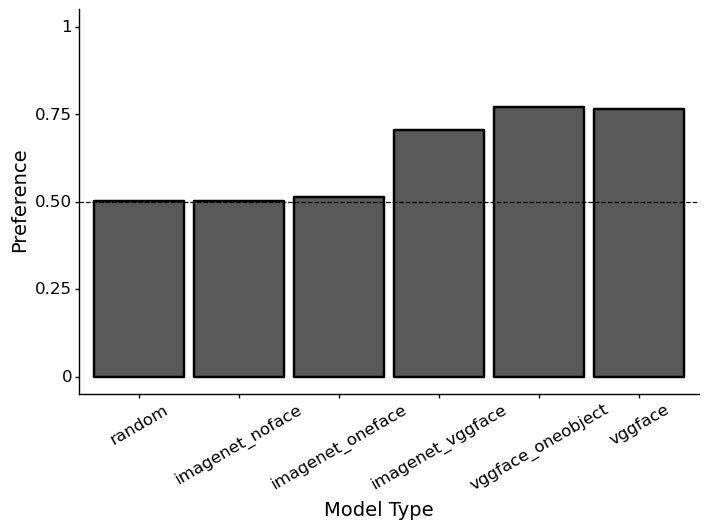


['cornet_z_sl', 'cropped_face', 'output']


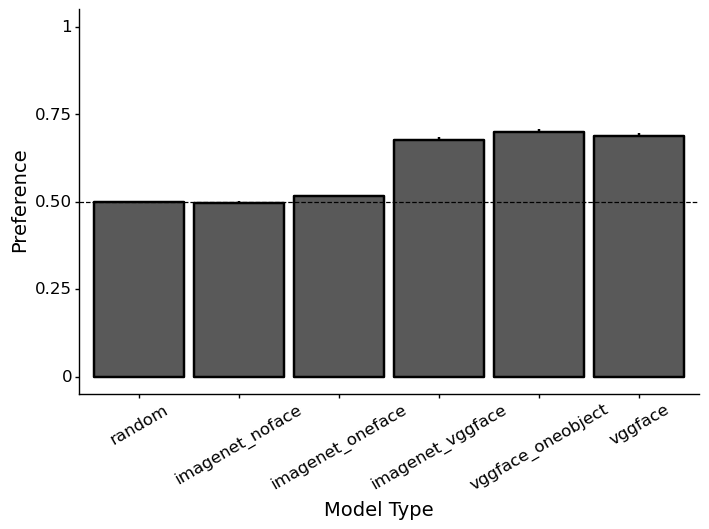


['cornet_z_sl', 'schematic', 'output']


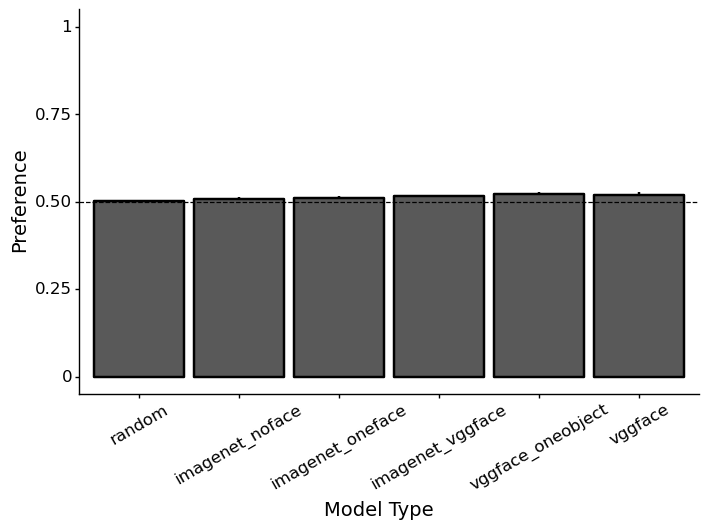


['cornet_z_sl', 'au', 'output']


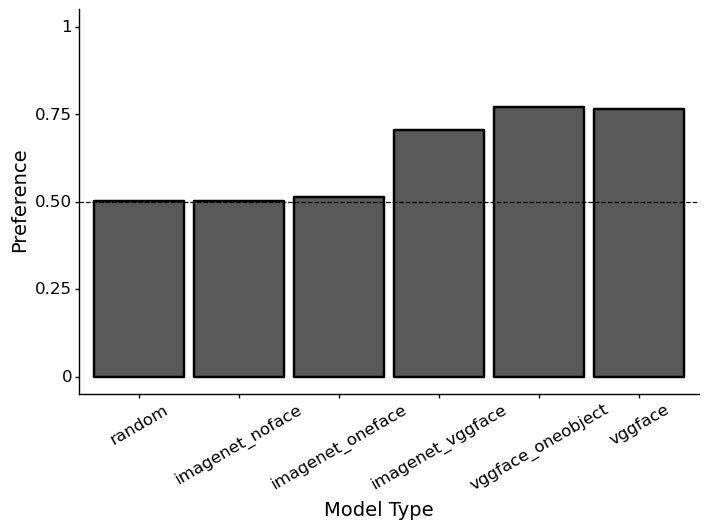

In [28]:
"""
Plot inversion preference mean data
"""
exp = 'inversion_pref'


cond = ['upright','inverted']
test_type = ['cropped_face','schematic','au']

suf = ''

for mm in enumerate(model_type):
    for ll in sublayer_type[mm[0]]:
        for tt in test_type:
            summary_df = pd.DataFrame(columns = ['arch','train_type', 'pref', 'ci_low', 'ci_high'])
            for trt in train_type:
            
            
                curr_df = pd.read_csv(f'{results_dir}/{exp}/{mm[1]}_{trt}_{ll}_{tt}{suf}.csv')
                curr_df = curr_df.loc[curr_df['test_stim'] == tt]
                
                curr_data = pd.Series([mm[1],trt,curr_df['pref'], curr_df['ci_high'],curr_df['ci_low'] ],
                                        index = summary_df.columns)
                summary_df = summary_df.append(curr_data, ignore_index=True)

                #summary_df = pd.concat([summary_df, curr_data])

            summary_df['pref'] = summary_df['pref'].astype(float)
            summary_df['ci_high'] = summary_df['ci_high'].astype(float)
            summary_df['ci_low'] = summary_df['ci_low'].astype(float)

            #summary_df['condition'] = pd.Categorical(summary_df['condition'], categories = cond, ordered = False)
            summary_df['train_type'] = pd.Categorical(summary_df['train_type'], categories = train_type, ordered = False)
            print([mm[1],tt, ll])

            plot = ggplot(summary_df, aes(x = 'train_type', y = 'pref')) + \
                    geom_linerange(aes(x='train_type',  ymax = 'ci_high', ymin = 'ci_low'), size = 1) + \
                    geom_col(stat='identity', size = 1, color = 'Black') + ylim(0,1) + \
                    geom_hline(yintercept=.5, linetype = 'dashed') + theme_classic() + xlab('Model Type') + ylab('Preference') + \
                    theme(text = element_text(color ='black'), axis_text_x= element_text(angle = 30, size = 12),axis_text_y= element_text(size = 12),axis_title=element_text(size = 14),
                                                                                    axis_line=element_line(), 
                                                                                    panel_border=element_blank(),
                                                                                    figure_size = (8, 5))

            print(plot)
            del plot
            

In [15]:
summary_df

arch         train_type      pref    ci_low   ci_high
0    cornet_z_cl             random  0.502254  0.501739  0.502765
1    cornet_z_cl    imagenet_noface  0.504654  0.502781  0.506590
2    cornet_z_cl   imagenet_oneface  0.506511  0.504474  0.508556
3    cornet_z_cl   imagenet_vggface  0.678096  0.672837  0.683426
4    cornet_z_cl  vggface_oneobject  0.560179  0.556498  0.563754
..           ...                ...       ...       ...       ...
103  cornet_z_sl    imagenet_noface  0.501563  0.500279  0.502829
104  cornet_z_sl   imagenet_oneface  0.513368  0.512151  0.514596
105  cornet_z_sl   imagenet_vggface  0.725087  0.722486  0.727799
106  cornet_z_sl  vggface_oneobject  0.770276  0.767780  0.772716
107  cornet_z_sl            vggface  0.761606  0.759014  0.764141

[108 rows x 5 columns]